# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 
- **RM** : an increase in the RM value would mean that houses in the neighborhood are bigger and thus, related to wealthier owners. This would increase MDEV: the more the number of rooms, the more expensive the houses are.
- **LSTAT**: an increase LSTAT is related with an increase in the ammount of homeowners with higher net worth, in other words, how many people is wealthier compared to people from the neighborhood. Thus, MDEV would decrease with an increase in the LSTAT,  meaning the neighborhood is poorer. Lower houses prices.
- **PTRATIO**: the PTRATIO quantifies the massification in schools in the area. The bigger PTRATIO, the higher the massification, the less attractive for possible buyers and, thus,  the lower the MDEV, which are the prices at which houses will be sold.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** The model has been succesful at capturing the variation of the target variable since the achieved R_2 score = 0.923

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=.2 , random_state=19)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Splitting the dataset into training and testing subset is a way to measure how good our predictions are and make changes to improve the model and have better prediction. 

Lack of testing can derive in bad predictions. If we do not test our model we do not have an idea of what behaviour it will have.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

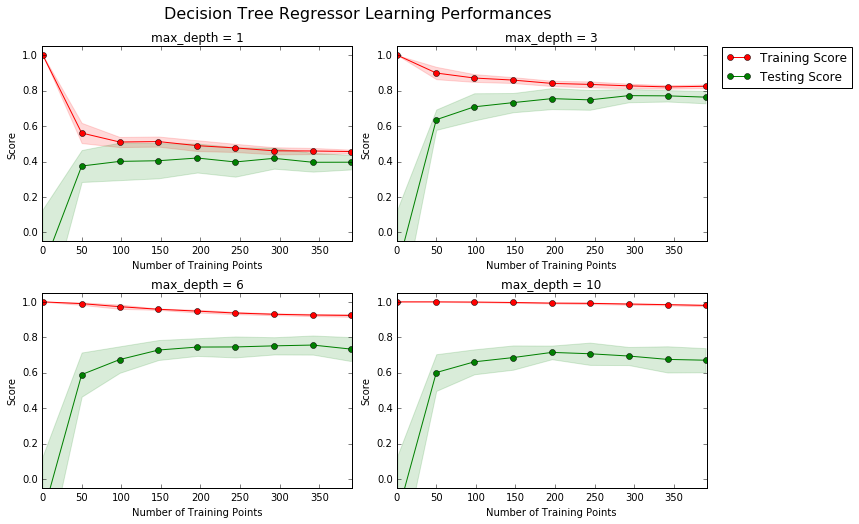

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** 

- As I have seen (see reference) R² is a measure of how the variance of the error of the prediction($\sum{(y_i -f_i)²}=\sum{e_i^2}$) is related to thee variance of the output variable ($\sum{(y_i-\bar{y})²}$) , expressed as

    $$ R²=1-\frac{\sum{(y_i-f_i)²}}{\sum{(y_i-\bar{y})²}}$$

    Hence the lower the error, the best we have predicted the output (the closer $R²$ is to 1), and this may indicate some overfitting issue.

    I would choose either 3 as maximum depth for the model. A depth of 3 would give a good estimation with lower complexity. 
    From the figure, we can see that for 0 samples R² is 0 since we have not yet trained the model and R² is 1 one for testing dataset since we do not have anything to predict. When the numer of samples increase, the R² score of the training dataset increases, meaning the model is starting to precict, and the curve for testing dataset gets closer to training curve. When the number of samples increase, the two curves approximate. 
    
    They seem to converge to a value of R² equal to 0.8 from 300 samples. This means that prediction will not change significantly with an increase in the amount of samples.
    
    Hence, for having a good prediction 300 samples is good enough.
    
    
- Having more training points may not benefit the models where,  at 350,  they seem to have reached an stationary tendency. However in the case of a depth equal to 6,  R² seems to decrease a little, and having more training points would hep us to determine the tendency. 


https://en.wikipedia.org/wiki/Coefficient_of_determination

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

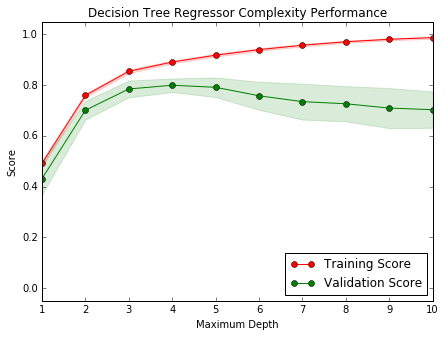

In [13]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

- When the model is trained with a maximum depth of 1 the model suffers from high bias, since it generalizes "too much" (low validation score, since the model is noty able to predict properly), higher complexity would be needed so as the model is better at classfyinng new inputs.

- I think that now, when the model is trained with a maximum depth of 10 it suffers from high variance, and now it fails at generalizing new inputs (validations score decreases). We can see that the R² score is decreasing for the validation dataset, whereas it has almost reached its maximum for the training dataset, producing a gap between the two curves. This hints a possible overfitting. Lower complexity would be needed so as the model is better at classfyinng new inputs. 


The training score gets better as the maximum depth increases, since the complexity grows and the model is better at fitting training data. However, the cross validation score is low when the model is very simple  (low maximum depth) since it is not able to predict very well, then gets better at medium complexity, and decreases again for maximum depth due to overfitting. We should find a tradeoff between low and high complexity where the model it is actually good at predicting new otuputs.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** I would peek a depth of 4, since I thikg it gives the maximum R² score for the cross validation dataset (a tradeoff between low and high maximum depth), before it starts to decrease again. There must be a tradeoff between low and high complexity, under and over fitting (see answer in Question 5).

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Its aim is to find a good combination of parameters for selecting a good cross validation set so we get the best performance. It can be appplied importing from sklearn GridSearchCV, which implements a “fit” and a “score” method for finding the best set of parameters.(http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV).

More info about grid search here: http://scikit-learn.org/stable/modules/grid_search.html

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** 
- **Cross-validation**: is a technique used to check how well a model can generalize with an independent dataset. It is very useful for limited-size datasets where conventional validation using the error on the training dataset would not be a good estimator, and the test dataset would not represent correctly the assessment of the model performance.
Usually, one round of cross validation(cv) is as follows:

CV is usually performed making partitions of the dataset into training set and testing/validation set. The model is trained using the training set and then tested with the test set. 

Multiple rounds can be performend, randomly splitting the dataset so as the results are not dependent of the partition (unbiased) and the model is able to generalize better.
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

- **k-fold cross-validation**: is technique  which splits the dataset in a specified number of subsets (k). One of the subsets is used as a testing/validation set, and the other k-1 subsets are used as training sets. 
This proccess is repeated k times, with each of the subset acting as testing set once. When the process is completed, the k results from the folds can be averaged into one single estimation.
https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

We could benefit from using k folds in grid search since  it is less dependent of the partition, making an average estimation after using each fold as a test set. With other techniques, data could be not evenly distributed and suffer from high bias, which would not be good for making the the decision of which is the best combination of parameters.

Grid search helps to find the best set of parameters. Instead of finding the best combination manually, it can run automatically for diferent combinations and benefit of using K-fold each time to obtain a better estimation of the performance achieved. This eases the process when compared with manual tuning.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [14]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    from sklearn import tree
    regressor = tree.DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn.metrics import make_scorer
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    from sklearn.grid_search import GridSearchCV
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [15]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** Max depth is 4 for the optimal model.

It corroborates the hypothesis that max depth must be an intermediate value. Which is the value I picked in question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [16]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $352,333.33
Predicted selling price for Client 2's home: $202,020.00
Predicted selling price for Client 3's home: $924,840.00


**Answer: **

- I can make a prior guess taking into consideration features we have from the houses. I can first try to order them from which I think it will be  the more expensive to the less one.
    
   We can intuitive guess that higher household net worth and more room will increase the price, and so will the student-teacher ratio when this is lower.
    
   Hence:
   1. Most expensive: **Client 3**.
       It has the highest household net worth (is in the top 7th percent), the higher number of rooms and lower student-teacher ratio. This will be definitely the most expensive. 
       The price will be top quartile, near the maximum (household net worth is in the 7th): near **\$1,024,800.00**
   2. Average expensive: **Client 1**.
       It has intermediate values of household net worth, number of rooms and student-teacher ratio. This house will have an intermediate price.
       Giving the household net worth is in the 34th percent, and the other features have intermediate values, we can assign a value that is in the middle of the second top quartile (around bottom 66th percent/ top 34th percent). Hence, the price will be: mean + (maximum - mean)/4: **\$596,957.205**
   3. Less expensive: **Client 2**.
      The household net worth is the lowest of the three cases, and so do the number of rooms, which indicates that the price of this house will be lower than the other two cases. And, finally, the student-teacher ratio is the highest! This means that schools in the area are massificated, and so this house will be less atractive for families.
      Giving the household net worth is in the botthom 55th percent, and the other features have lower values, we can assign a value that is near the mean: **\$454,342.94**


- **PREDICTED VALUES from simulation**:
Rearranging for comparing with the previous answer:

Predicted selling price for Client 3's home: \$924,840.00 (guessed **\$1,024,800.00**)

Predicted selling price for Client 1's home: \$352,333.33 (guessed **\$596,957.205**)

Predicted selling price for Client 2's home: \$202,020.00 (guessed **\$454,342.94**)



- **Conclusions. Are these values reasonable given the features?**
We can see there is a significant difference between the simulated prediction and the guessed prediction in terms of the values of the prices. This could be due to the fact that for guessing the price I only used the overall statistics and compared between the three cases. 

A better guessing prediction could have been made if available the statistics for each value. However, the simulated prediction took these factors into consideration and it was able to make a much more accurate prediction. 

The order of the ranking is, however, the same, results are consistent. This means we were able to make an approximated guessing of the value of the houses with the supplied information.


- Note: statistics **FROM DATA EXPLORATION**

    Statistics for Boston housing dataset:

    Minimum price: \$105,000.00

    Maximum price: \$1,024,800.00

    Mean price: \$454,342.94

    Median price \$438,900.00

    Standard deviation of prices: \$165,171.13

In [17]:
maximum_price=1024800.00
mean_price= 454342.94

second_price= mean_price+.25*(maximum_price-mean_price)
print second_price

596957.205


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $302,400.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
This model can have good value for tracing general patterns and preferences in humans in general, although life has changed, there are a few things that remain unalterable throught time. This is, safety, quality of building, quality of education, quality of life ( how many resources are available in the neighborhood, such as , commercial areas, markets, good hospitals and schoods, traffic flow, gardens, sportive and cultural spaces, population density..).

- **How relevant today is data that was collected from 1978?** Already answered. Some facts remain the same: families look for safe neighborhoods, with good schools and hospitals, parks, gardens, sport and cultural offer... Some other factors are up to the preference of the person in question: there are some that look for quiet places for living (outskirts, small villages...) and younger or urbanites who may prefer to live in the middle of a busy city.
- **Are the features present in the data sufficient to describe a home?** We could definitely make a much more accurate prediction with additional feature as the ones mentioned few lines above.
- **Is the model robust enough to make consistent predictions?** It is a rough approximation of the main factors that affect house prices: how rich is the neighborhood, how big the house is (number of rooms) and life quality ( students-teacher ratio). Very sinthethized but a good approximation to know which houses will be more expensive or less expensive. It is robust enough.
- **Would data collected in an urban city like Boston be applicable in a rural city?** The factors taken into consideration are determinant for houses anywhere, but rural places may have additional features to have into consideration, since in a rural city it may be important to have public services, food and supply stores nearby.